## Testing to see whether compact and mid-size hybrid cars differ in their average miles per gallon.

#### Independent t-Test
An independent t test is used when you have one independent variable that is categorical and a grouping variable, and one dependent continuous variable. Use an independent t-test when you want to determine whether the means of two different, unrelated groups are the same or different.

#### Import Packages

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind

#### Import Data

In [2]:
hybrid2013 = pd.read_csv('C:/Users/desja/python_course/datasets/hybrid2013.csv')
hybrid2013

,carid,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,carclass_id
0,111,Prius C,2013,19080,8.70,50,50,C,1
1,112,Jetta,2013,24995,12.66,45,45,C,1
2,113,Civic,2013,24360,10.20,44,44,C,1
3,114,Prius,2013,24200,10.20,50,50,M,3
4,115,Fusion FWD,2013,27200,11.72,47,47,M,3
5,116,C-Max FWD,2013,25200,12.35,43,43,L,2
6,117,Insight,2013,18600,11.76,42,42,C,1
7,118,Camry LE,2013,26140,13.51,41,41,M,3
8,119,Camry LXLE,2013,27670,13.33,40,40,M,3
9,120,Sonata,2013,25650,11.76,38,38,M,3


In [ ]:
#### Test Assumptions
The only assumption that independent t has is normality. You will need to test normality for each of your groups - compact and mid-sized hybrid cars.

This code is very similar to before, but has an extra layer of specifying which values from the carclass you want to examine:

<Axes: >

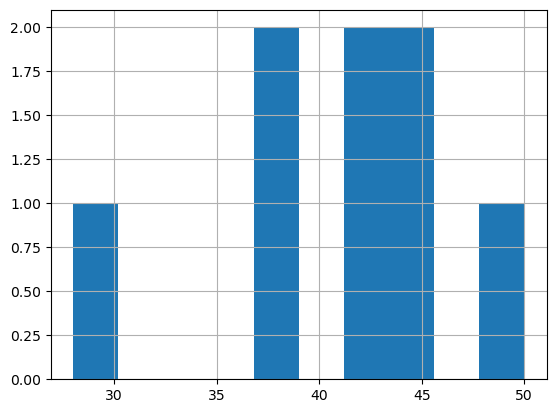

In [3]:
hybrid2013.mpg[hybrid2013.carclass == 'C'].hist()

#### Results:
So the name of the dataset and the name of the variable go first, but then you need to specify that you only want a histogram for the values that meet the condition C for compact cars.

#### Same thing for the mid-size hybrid cars:

<Axes: >

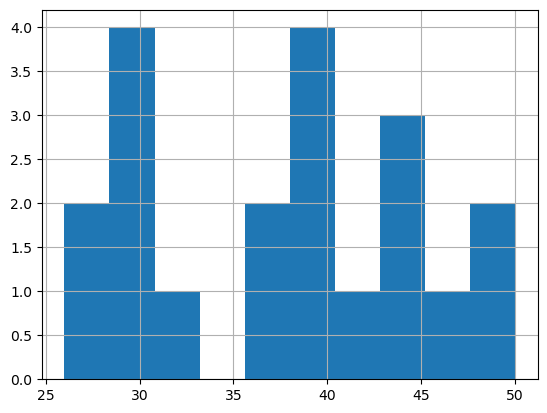

In [4]:
hybrid2013.mpg[hybrid2013.carclass == 'M'].hist()

#### Results
It looks like neither of these are bell-shaped, and are thus not normal, but for the purposes of learning, you will continue.

#### Run the Analysis

You will use the function ttest_ind() to run an independent t test in Python. The arguments are two things you want to compare to each other. If you happen to have those two things in separate columns, then it would simply look like this mock code:
ttest_ind(data[column1], data[column2])

But since in this case, your data is all stored in the same carclass column, and you want to pull out the data for certain values, the code looks just a bit more complicated:

In [5]:
ttest_ind(hybrid2013.mpg[hybrid2013.carclass == 'C'], hybrid2013.mpg[hybrid2013.carclass == 'M'])

TtestResult(statistic=1.0751886097093057, pvalue=0.29216712457079796, df=26.0)

#### Results 

Looks like there is no significant difference between compact and mid-size hybrid cars in terms of miles per gallon, since the p value is not less than .05. The t value is also pretty small, which is another good indication.

Here you may want to examine the mean for each group to see if there is a difference in the means. You can do this by using the .mean() function:

In [6]:
hybrid2013.mpg[hybrid2013.carclass == 'C'].mean()

40.75

In [7]:
hybrid2013.mpg[hybrid2013.carclass == 'M'].mean()

37.4

#### Results shows not a lot of difference in the avg mpg between the two cars